## Research Question:
Has the mean price of rent for 2022 in Barcelona, Spain increased compared to the mean price for 2021?

## Solution:
Hypothesis testing <br>
<font color=blue>Null hypothesis</font> : Rent price has not increased in 2022 <br>
<font color=blue>Alternative hypothesis</font>  : Rent price has increased

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [33]:
from scipy.stats import shapiro 
from statsmodels.stats.descriptivestats import sign_test

In [20]:
data = pd.read_csv('Barcelona_rent_price.csv')

In [8]:
data.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09


In [21]:
data.columns=data.columns.str.lower()

In [22]:
# create 2021 and 2022 rent price data
data_2021 = data[data['year']==2021]
data_2022 = data[data['year']==2022]

In [23]:
# create random sample for 2022 rent price
sample_data_2022 =data_2022.sample(n=40)

## 1. Examine Data

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


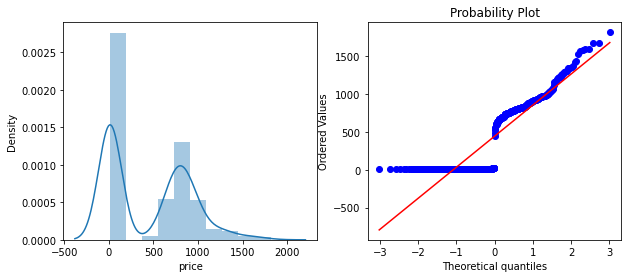

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.distplot(data_2021['price'], ax=ax[0])

stats.probplot(data_2021['price'], dist="norm", plot=plt)
plt.show()

In [62]:
shapiro(data_2021['price'])

ShapiroResult(statistic=0.7976830005645752, pvalue=2.1478261632265254e-25)

In [13]:
price_mean_2021 =data_2021['price'].mean()
price_std_2021=np.std(data_2021['price'])
price_size_2021=np.size(data_2021['price'])

print('Population mean(hypothesis mean) : ',price_mean_2021)
print('Populatin standard deviation: ', price_std_2021)
print('Population size: ',price_size_2021 )

Population mean(hypothesis mean) :  442.15722222222234
Populatin standard deviation:  456.93506833035025
Population size:  540


In [24]:
observed_mean_2022 =sample_data_2022['price'].mean()
observed_std_2022=np.std(sample_data_2022['price'])
sample_size_2022=np.size(sample_data_2022['price'])

print('Population mean(hypothesis mean) : ',observed_mean_2022)
print('Populatin standard deviation: ', observed_std_2022)
print('Population size: ',sample_size_2022)

Population mean(hypothesis mean) :  523.5925
Populatin standard deviation:  571.5330105897209
Population size:  40


## 2.Test statistic

The sample is from a non-normal population. Because the sample size is large enough (>30) CLT alows us use student's t-test <br>

<font color=blue>Null hypothesis</font> : Rent price has not increased in 2022 (µ =442)<br>
<font color=blue>Alternative hypothesis</font>  : Rent price has increased (µ >442)

α=0.05 (5% risk of commiting Type I error )

### Student's one-sided t-test

#### p-value approach

In [38]:
stats.ttest_1samp(sample_data_2022['price'],price_mean_2021, alternative='greater')

Ttest_1sampResult(statistic=0.8898228751415281, pvalue=0.1895086177664443)

#### The critical value approach

In [52]:
# define t critical value
stats.t.ppf(q=0.025,df=39)

-2.0226909117347285

In [54]:
t_stat = (observed_mean_2022 -price_mean_2021)/(observed_std_2022/np.sqrt(sample_size_2022))
print(t_stat)

0.9011586553873996


Because p-value is greater than 0.05 ,or t-statistic is less than t-critical value we do not reject the null hypothesis

## Conclusion

Based on the observed sample mean there is no evidence that the price of rent for 2022 in Barcelona, Spain has increased from its value for 2021.

### Construct 95% confidence interval for average price of rent in 2022

In [60]:
lower_limit = observed_mean_2022 - 2 * (observed_std_2022/np.sqrt(sample_size_2022))
upper_limit = observed_mean_2022 + 2 * (observed_std_2022/np.sqrt(sample_size_2022))
print((lower_limit, upper_limit))


(342.85789285633473, 704.3271071436652)


The same decision is obtained. Because the hypothesis value falls in the interval, there is insufficient evidence that the rent price has increased in 2022 